In [23]:
import requests as req 

# api의 URL 만들거다
url = 'http://apis.data.go.kr/1262000/CountryPopulationService2/getCountryPopulationList2'

# api 인증키 
api_key = 'JdSK4vjg0evWUiUmf2PPWcMBXVjW3cgEcDa4/6CywdtxFMO31f9vVXL0MSiVa0BBkUf2ml1wGSZ64ZMnExSTyQ=='

# 요청에 담을 데이터
# [요청 메시지 명세] 확인 - 필수값은 반드시 넣고, 필수 아닌거는 선택
# dict 자료형으로 요청할 때 같이 보낼 값을 모음
params={
    'serviceKey' : api_key,
    'pageNo' : 1,
    'numOfRows' : 10,
    'cond[country_nm::EQ]' : '일본',
    'returnType' : 'JSON'
}

# 요청한 결과를 담을 데이터는 params  매개변수로 전달한다.
resp = req.get(url, params=params)
resp.json()

# data라는 이름으로 리스트가 들어있는 것을 확인했다.
json_data = resp.json()['data']
json_data

#json 객체가 담긴 리스트를 표 형태로 바꾸기 위해 pandas import
import pandas as pd
pd.DataFrame(json_data)



,country_eng_nm,country_iso_alp2,country_nm,popltn_cn,popltn_cnt,popltn_cnt_src,popltn_growth,popltn_growth_src,popltn_month,popltn_year
0,Japan,JP,일본,None,126633000,('19) World Bank (최근 수정일 : 2023.12.18.),-0.14,('19) World Bank (최근 수정일 : 2023.12.18.),None,2019
1,Japan,JP,일본,None,126811000,('18) World Bank (최근 수정일 : 2023.12.18.),-0.13,('18) World Bank (최근 수정일 : 2023.12.18.),None,2018


In [37]:
import requests as req 
# 주식시세
# Call Back URL
url = 'http://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo'

params = {
    'serviceKey' : api_key,
    'numOfRows' : 100,
    'pageNo' : 1,
    'resultType' : 'json',
    'itmsNm' : '삼성전자' # 종목명
}

resp = req.get(url, params=params)

json_resp = resp.json()
json_resp



{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'},
  'body': {'numOfRows': 100,
   'pageNo': 1,
   'totalCount': 1017,
   'items': {'item': [{'basDt': '20240214',
      'srtnCd': '005930',
      'isinCd': 'KR7005930003',
      'itmsNm': '삼성전자',
      'mrktCtg': 'KOSPI',
      'clpr': '74000',
      'vs': '-1200',
      'fltRt': '-1.6',
      'mkp': '73700',
      'hipr': '74300',
      'lopr': '73700',
      'trqu': '12434945',
      'trPrc': '920046681339',
      'lstgStCnt': '5969782550',
      'mrktTotAmt': '441763908700000'},
     {'basDt': '20240213',
      'srtnCd': '005930',
      'isinCd': 'KR7005930003',
      'itmsNm': '삼성전자',
      'mrktCtg': 'KOSPI',
      'clpr': '75200',
      'vs': '1100',
      'fltRt': '1.48',
      'mkp': '74800',
      'hipr': '75200',
      'lopr': '74400',
      'trqu': '21966745',
      'trPrc': '1645918689800',
      'lstgStCnt': '5969782550',
      'mrktTotAmt': '448927647760000'},
     {'basDt': '20240208',
      'srt

In [38]:
json_body = json_resp['response']['body']

json_body

json_items = json_body['items']
json_item = json_items['item']

json_item

[{'basDt': '20240214',
  'srtnCd': '005930',
  'isinCd': 'KR7005930003',
  'itmsNm': '삼성전자',
  'mrktCtg': 'KOSPI',
  'clpr': '74000',
  'vs': '-1200',
  'fltRt': '-1.6',
  'mkp': '73700',
  'hipr': '74300',
  'lopr': '73700',
  'trqu': '12434945',
  'trPrc': '920046681339',
  'lstgStCnt': '5969782550',
  'mrktTotAmt': '441763908700000'},
 {'basDt': '20240213',
  'srtnCd': '005930',
  'isinCd': 'KR7005930003',
  'itmsNm': '삼성전자',
  'mrktCtg': 'KOSPI',
  'clpr': '75200',
  'vs': '1100',
  'fltRt': '1.48',
  'mkp': '74800',
  'hipr': '75200',
  'lopr': '74400',
  'trqu': '21966745',
  'trPrc': '1645918689800',
  'lstgStCnt': '5969782550',
  'mrktTotAmt': '448927647760000'},
 {'basDt': '20240208',
  'srtnCd': '005930',
  'isinCd': 'KR7005930003',
  'itmsNm': '삼성전자',
  'mrktCtg': 'KOSPI',
  'clpr': '74100',
  'vs': '-900',
  'fltRt': '-1.2',
  'mkp': '75000',
  'hipr': '75200',
  'lopr': '73600',
  'trqu': '20810708',
  'trPrc': '1545421527910',
  'lstgStCnt': '5969782550',
  'mrktTotAmt': 

In [45]:
print(len(json_item)) #10

df_item = pd.json_normalize(json_item)

df_item.info()

100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   basDt       100 non-null    object
 1   srtnCd      100 non-null    object
 2   isinCd      100 non-null    object
 3   itmsNm      100 non-null    object
 4   mrktCtg     100 non-null    object
 5   clpr        100 non-null    object
 6   vs          100 non-null    object
 7   fltRt       100 non-null    object
 8   mkp         100 non-null    object
 9   hipr        100 non-null    object
 10  lopr        100 non-null    object
 11  trqu        100 non-null    object
 12  trPrc       100 non-null    object
 13  lstgStCnt   100 non-null    object
 14  mrktTotAmt  100 non-null    object
dtypes: object(15)
memory usage: 11.8+ KB


In [64]:
# 불필요한 컬럼 제거
# [응답 메시지 명세] 참고
# drop(): 행삭제 함수
df_item.drop(['srtnCd', 'isinCd', 'mrktCtg', 'trPrc', 'lstgStCnt', 'mrktTotAmt'], axis=1, inplace=True)
df_item.head()

df_item.columns = ['날짜', '종목명', '종가', '전일 대비 등락', '전일 대비 등락률', '시가', '고가', '저가', '거래량']
df_item.head()

df_item = df_item[['날짜', '종목명', '전일 대비 등락', '전일 대비 등락률',  '종가', '시가', '고가', '저가', '거래량']]
df_item.head()

KeyError: "['srtnCd', 'isinCd', 'mrktCtg', 'trPrc', 'lstgStCnt', 'mrktTotAmt'] not found in axis"

In [49]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

df_item.info()

# 날짜 컬럼의 타입을 날짜로 변경(pandas에서 제공하는 날짜)
df_item['날짜'] = pd.to_datetime(df_item['날짜'])

# 날짜 컬럼을 index로 사용하고싶음
df_item.set_index('날짜', inplace=True)
df_item

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   날짜         100 non-null    object
 1   종목명        100 non-null    object
 2   전일 대비 등락   100 non-null    object
 3   전일 대비 등락률  100 non-null    object
 4   종가         100 non-null    object
 5   시가         100 non-null    object
 6   고가         100 non-null    object
 7   저가         100 non-null    object
 8   거래량        100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


,종목명,전일 대비 등락,전일 대비 등락률,종가,시가,고가,저가,거래량
날짜,,,,,,,,
2024-02-14,삼성전자,-1200,-1.6,74000,73700,74300,73700,12434945
2024-02-13,삼성전자,1100,1.48,75200,74800,75200,74400,21966745
2024-02-08,삼성전자,-900,-1.2,74100,75000,75200,73600,20810708
2024-02-07,삼성전자,600,.81,75000,74600,75500,74300,16566445
2024-02-06,삼성전자,100,.13,74400,74300,74700,73300,14559254
...,...,...,...,...,...,...,...,...
2023-09-20,삼성전자,-200,-.29,69600,70000,70300,69500,10873015
2023-09-19,삼성전자,-400,-.57,69800,70400,70800,69600,11820188
2023-09-18,삼성전자,-1800,-2.5,70200,71300,71700,70200,16040727


<Axes: xlabel='날짜'>

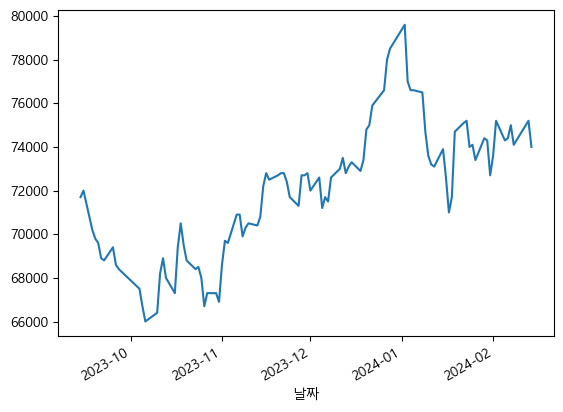

In [50]:
# 종가 컬럼 타입 정수로 변경
df_item['종가'] = pd.to_numeric(df_item['종가'])

df_item['종가'].plot()

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarnin

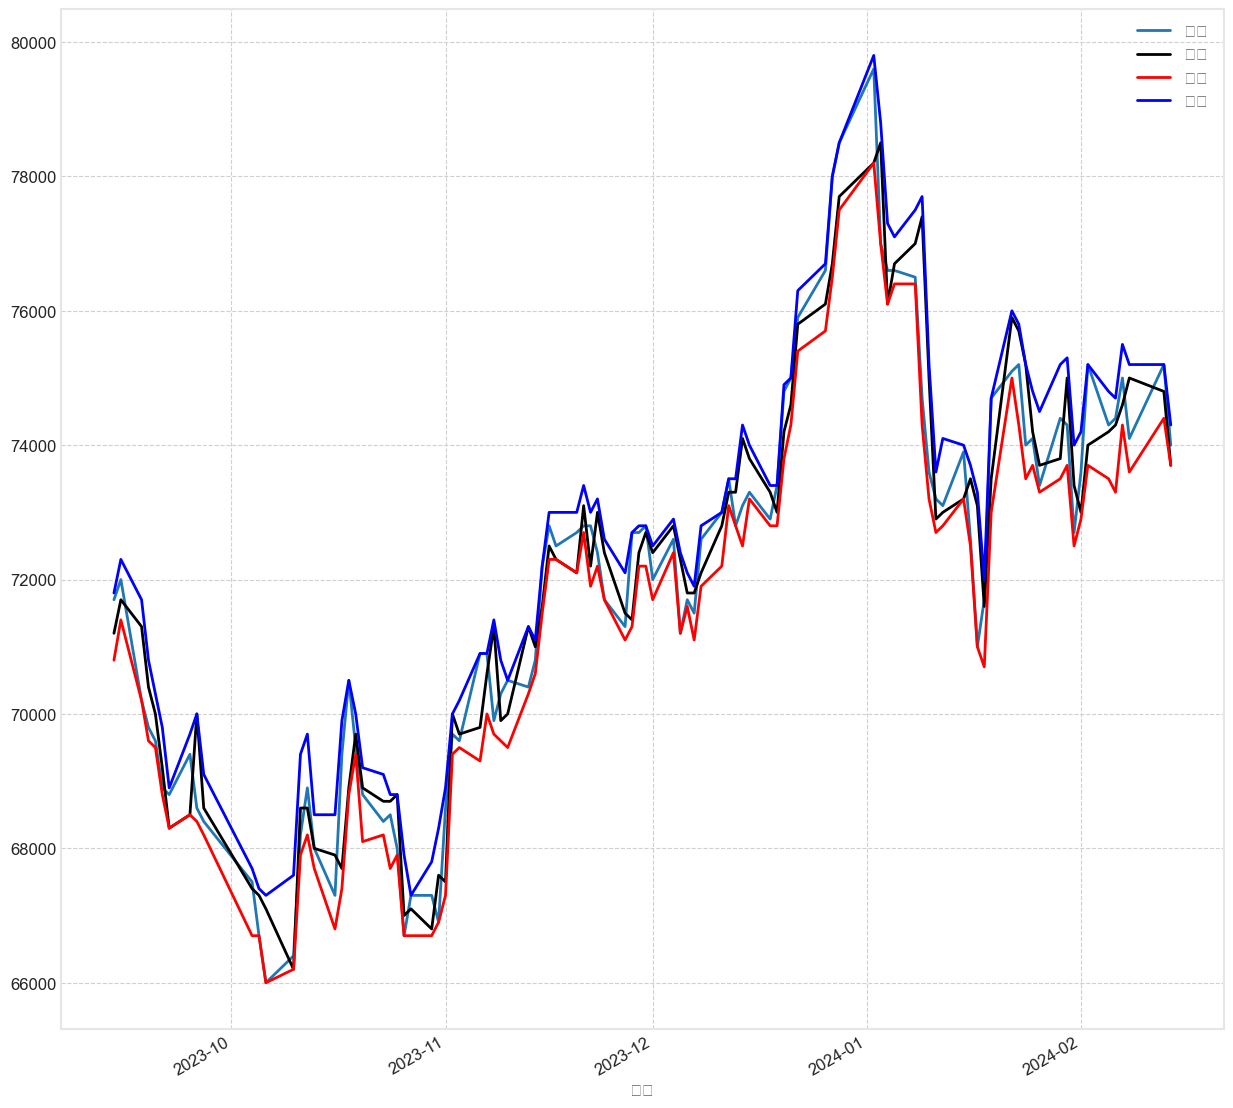

In [71]:
df_item['종가'] = pd.to_numeric(df_item['종가'])
df_item['시가'] = pd.to_numeric(df_item['시가'])
df_item['저가'] = pd.to_numeric(df_item['저가'])
df_item['고가'] = pd.to_numeric(df_item['고가'])
df_item['거래량'] = pd.to_numeric(df_item['거래량'])

figure = plt.figure(figsize=(15, 15))
ax1 = figure.add_subplot(111)

df_item.plot(kind='line', y='종가', ax=ax1)
df_item.plot(kind='line', y='시가', ax=ax1, color='black')
df_item.plot(kind='line', y='저가', ax=ax1, color='r')
df_item.plot(kind='line', y='고가', ax=ax1, color='b')
#df_item.plot(kind='line', y='거래량', ax=ax1, color='green')

plt.show()

In [59]:
!pip install mplfinance


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------------------------------- 75.0/75.0 kB 2.1 MB/s eta 0:00:00


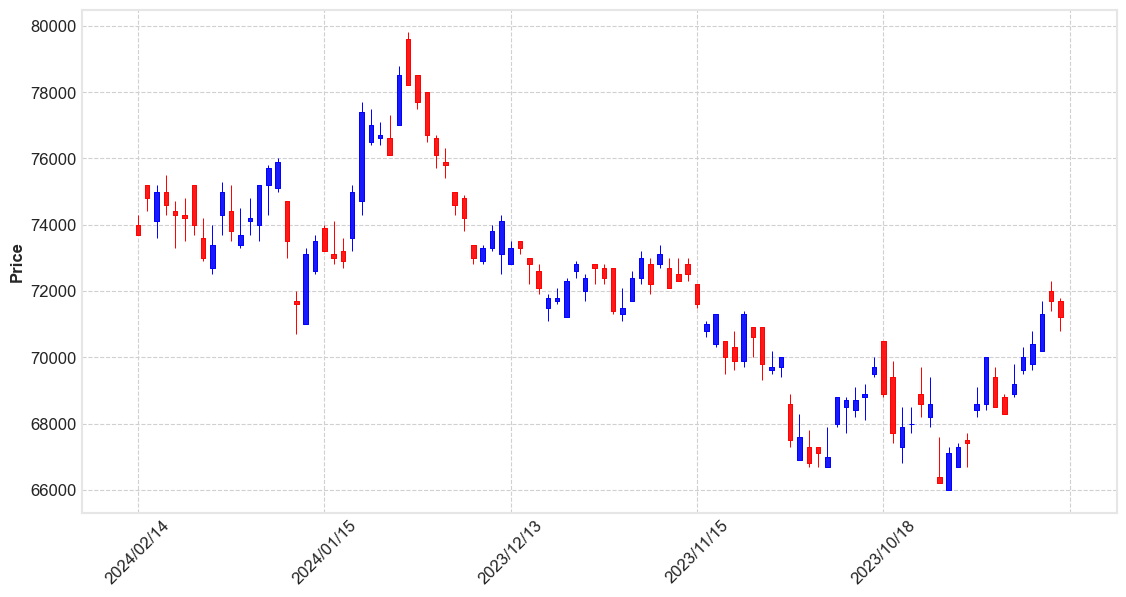

In [66]:
# mplfinance는 주식 차트에 특화된 시각화 라이브러리이다.

import mplfinance as mpf

# 데이터프레임에 'Open', 'High', 'Low', 'Close' 이름의 칼럼이 있어야 한다.
# 그리고 index는 날짜 타입이어야 한다.

df_candle = df_item.rename(columns={'시가':'Open', '고가':'High', '저가':'Low', '종가':'Close'})


# 캔들차트의 색상을 설정한다.
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)

# 그래프 스타일을 설정한다.
s = mpf.make_mpf_style(base_mpf_style='binance', marketcolors=mc)

# 캔들 차트를 그린다.
mpf.plot(df_candle, type='candle', style=s, figratio=(20,10), figscale=1.25, datetime_format='%Y/%m/%d')
